


### Setting Up Folders:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Projects

Mounted at /content/drive
/content/drive/MyDrive/Projects


In [ ]:
import os
if not os.path.isdir("cat-vs-dogs"):
  os.makedirs("cat-vs-dogs")
%cd cat-vs-dogs

/content/drive/MyDrive/Projects/cat-vs-dogs


### Download DataSet:

In [ ]:
!pip install opendatasets
import opendatasets as od
if not os.path.isdir("dog-and-cat-detection"):
  od.download("https://www.kaggle.com/datasets/andrewmvd/dog-and-cat-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmedghida
Your Kaggle Key: ··········


100%|██████████| 1.03G/1.03G [00:17<00:00, 64.8MB/s]


### EDA:

In [ ]:
import xml.etree.ElementTree as xml
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
image_name=np.random.choice(os.listdir('dog-and-cat-detection/images'))
annotation_name=image_name.split('.')[0]

In [ ]:
file= xml.parse(f"dog-and-cat-detection/annotations/{annotation_name}.xml")
root=file.getroot()
objects=root.find('object')
class_name=objects.find('name').text
bbox=objects.find('bndbox')
xmin=int(bbox.find('xmin').text)
ymin=int(bbox.find('ymin').text)
xmax=int(bbox.find('xmax').text)
ymax=int(bbox.find('ymax').text)

print(class_name,xmin,ymin,xmax,ymax)

dog 168 21 272 133


(-0.5, 223.5, 223.5, -0.5)

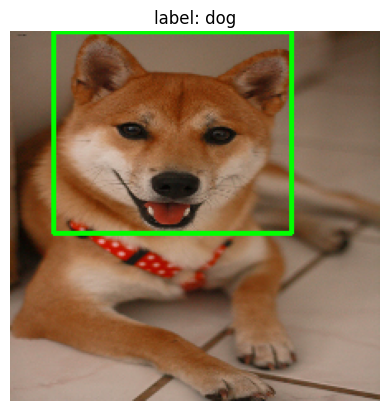

In [ ]:
image=cv2.imread(f"dog-and-cat-detection/images/{image_name}")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
resized=cv2.resize(image,(224,224))

ratioX=image.shape[0]/224
ratioY=image.shape[1]/224


cv2.rectangle(resized, (int(xmin/ratioY), int(ymin/ratioX)), (int(xmax/ratioY),int(ymax/ratioX)), (0, 255, 0),2)

plt.imshow(resized)
plt.title('label: '+class_name)
plt.axis('off')

In [ ]:
def get_xml_annotation(file_name):
  file= xml.parse(f"dog-and-cat-detection/annotations/{file_name}.xml")
  root=file.getroot()
  objects=root.find('object')
  class_name=objects.find('name').text
  bbox=objects.find('bndbox')
  xmin=int(bbox.find('xmin').text)
  ymin=int(bbox.find('ymin').text)
  xmax=int(bbox.find('xmax').text)
  ymax=int(bbox.find('ymax').text)
  bbx=[xmin,ymin,xmax,ymax]
  return class_name,bbx



In [ ]:
# made all data in csv file to make more analysis:
from tqdm import tqdm
file_name = [item.split('.')[0] for item in os.listdir("dog-and-cat-detection/images")]
classes=[]
boxes=[]
for file in tqdm(file_name):
  c,b=get_xml_annotation(file)
  classes.append(c)
  boxes.append(b)

df=pd.DataFrame({'file_name':file_name,'Target':classes,'BBox':boxes})
df

100%|██████████| 3686/3686 [14:21<00:00,  4.28it/s]


file_name Target                  BBox
0     Cats_Test3415    dog   [232, 44, 308, 112]
1     Cats_Test3416    dog   [138, 20, 342, 255]
2     Cats_Test3417    cat    [120, 3, 237, 131]
3     Cats_Test3418    dog   [135, 41, 373, 311]
4     Cats_Test3419    dog   [115, 37, 192, 136]
...             ...    ...                   ...
3681  Cats_Test1610    dog   [180, 34, 245, 115]
3682  Cats_Test1611    dog   [77, 147, 246, 385]
3683  Cats_Test1612    dog   [108, 65, 353, 339]
3684  Cats_Test1613    dog   [220, 81, 299, 148]
3685  Cats_Test1614    dog  [134, 149, 235, 264]

[3686 rows x 3 columns]

In [ ]:
#saving that df as csv file:
df.to_csv('data.csv', index=False)

In [ ]:
df

file_name Target                  BBox
0     Cats_Test3415    dog   [232, 44, 308, 112]
1     Cats_Test3416    dog   [138, 20, 342, 255]
2     Cats_Test3417    cat    [120, 3, 237, 131]
3     Cats_Test3418    dog   [135, 41, 373, 311]
4     Cats_Test3419    dog   [115, 37, 192, 136]
...             ...    ...                   ...
3681  Cats_Test1610    dog   [180, 34, 245, 115]
3682  Cats_Test1611    dog   [77, 147, 246, 385]
3683  Cats_Test1612    dog   [108, 65, 353, 339]
3684  Cats_Test1613    dog   [220, 81, 299, 148]
3685  Cats_Test1614    dog  [134, 149, 235, 264]

[3686 rows x 3 columns]

<Axes: xlabel='Target', ylabel='count'>

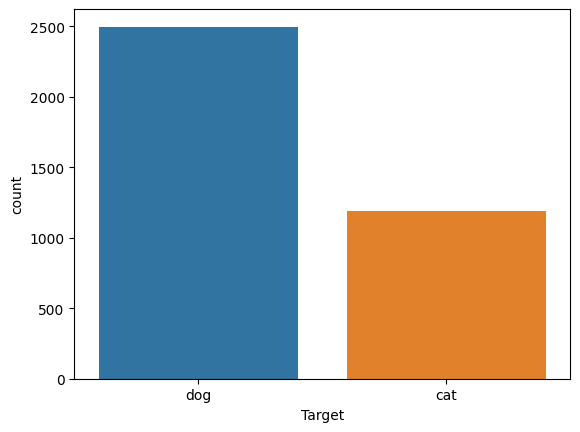

In [ ]:
sns.countplot(data=df,x='Target')

splitting data

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['file_name', 'BBox']]
y=df['Target']
xtrain,x_test,ytrain,y_test=train_test_split(x,y,stratify=y,test_size=.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(xtrain,ytrain,stratify=ytrain,test_size=.1,random_state=42)

In [ ]:
# Create DataFrames for training, testing, and validation sets

train_df = pd.DataFrame({'file_name': x_train['file_name'].tolist(), 'BBox': x_train['BBox'].tolist(), 'Target': y_train}).reset_index().drop(columns='index')
test_df = pd.DataFrame({'file_name': x_test['file_name'].tolist(), 'BBox': x_test['BBox'].tolist(), 'Target': y_test}).reset_index().drop(columns='index')
val_df = pd.DataFrame({'file_name': x_val['file_name'].tolist(), 'BBox': x_val['BBox'].tolist(), 'Target': y_val}).reset_index().drop(columns='index')

In [ ]:
train_df

file_name                  BBox Target
0      Cats_Test610   [150, 62, 317, 225]    dog
1      Cats_Test289    [147, 6, 390, 204]    cat
2      Cats_Test258     [70, 4, 319, 276]    cat
3     Cats_Test1424   [111, 77, 312, 277]    dog
4     Cats_Test1119  [175, 113, 255, 188]    dog
...             ...                   ...    ...
2980  Cats_Test1649  [172, 117, 284, 222]    dog
2981  Cats_Test1371  [121, 146, 249, 271]    dog
2982  Cats_Test2645   [81, 127, 237, 286]    cat
2983  Cats_Test3171  [186, 101, 284, 186]    dog
2984   Cats_Test177    [83, 20, 282, 219]    dog

[2985 rows x 3 columns]

### DataGenerator

`For Classification`

In [ ]:
#from ast import literal_eval
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, df, batch_size=32, image_shape=(224,224),preprocessing_func=None):
        super().__init__()

        """
        Attrs:

        df-> DataFrame which contain the Data
        Batch_size --> batch_size of Data that the generator will return back || Deafult=32
        image_shape -> Dimention of image that will get into model || Deafult=(224,224)
        preprocessing_func ---> apply preprocessing into image || Deafult=None

        Methods:

        len() --> will return number of batches.
        class_index() --> will return dictonary about class maped.

        """

        self.df = df
        self.batch_size = batch_size
        self.image_shape = image_shape
        self.preprocessing_func=preprocessing_func
        self.images_dir = os.path.join('dog-and-cat-detection','images')
        self.shuffle = True

        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))

    def load_image(self, file_name):
        # Load image and apply preprocessing
        image = cv2.imread(file_name)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        height = image.shape[0]
        width = image.shape[1]
        if self.image_shape is not None:
            image = cv2.resize(image, self.image_shape)

        if self.preprocessing_func is not None:
            image=self.preprocessing_func(image)

        return image,height,width


    def __getitem__(self, index):

        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        indices = np.arange(start, min(end, len(self.df)))
        batch = self.df.iloc[indices]

        X = np.empty((self.batch_size, *self.image_shape, 3))
        Y_Class = np.zeros((self.batch_size, 1))
        Y_bbox = np.zeros((self.batch_size, 4))

        for idx, row in enumerate(batch.itertuples()):
            img, height, width = self.load_image(os.path.join(self.images_dir, row.file_name + '.png'))
            bb = row.BBox
            class_name = 0 if row.Target == 'dog' else 1  # Use attribute access

            width_ratio = self.image_shape[0]/width
            height_ratio = self.image_shape[1]/height
            bb = [int(bb[0]*width_ratio), int(bb[1] * height_ratio), int(bb[2]*width_ratio), int(bb[3]*height_ratio)]

            X[idx] = img
            Y_Class[idx] = class_name
            Y_bbox[idx] = bb

        return X,[Y_Class,Y_bbox]


    def on_epoch_end(self):
        # Shuffle indexes at the end of each epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)
    def class_index():
        return{'Dog':0,'Cat':1}

In [ ]:
image_dim=224
batch_size=64
train_gen=DataGenerator(train_df,batch_size=batch_size,image_shape=(image_dim,image_dim),preprocessing_func=preprocess_input)
test_gen=DataGenerator(test_df,batch_size=batch_size,image_shape=(image_dim,image_dim),preprocessing_func=None)
val_gen=DataGenerator(val_df,batch_size=batch_size,image_shape=(image_dim,image_dim),preprocessing_func=preprocess_input)

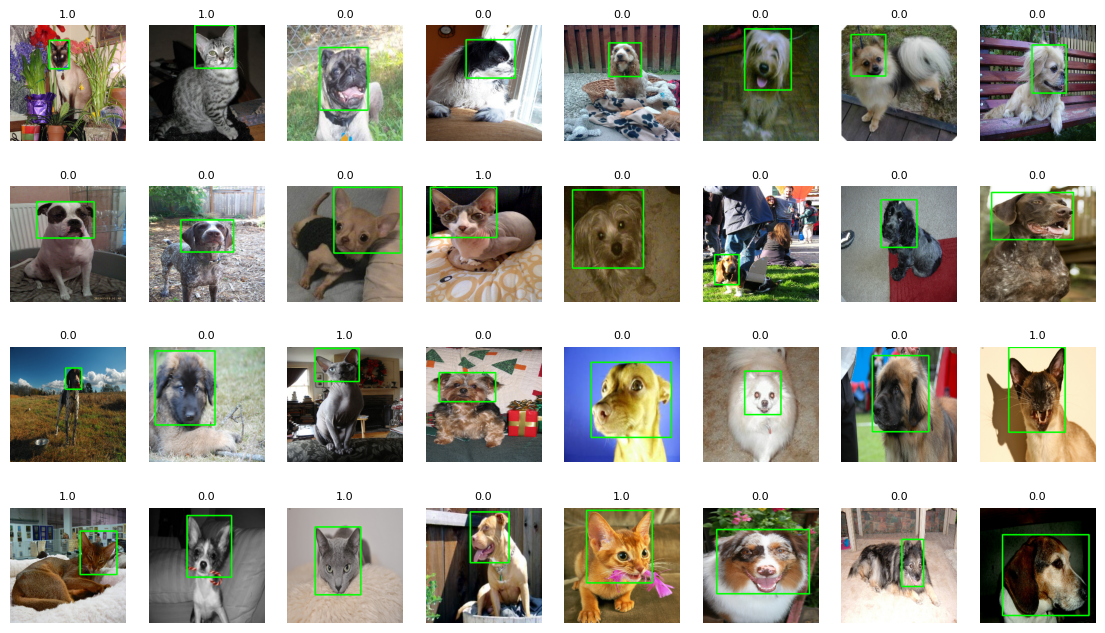

In [ ]:
images,[classes,BBox]=next(iter(test_gen))

fig, axes = plt.subplots(4, 8, figsize=(14, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    bb = BBox[i]

    # Convert bounding box coordinates to matplotlib format [xmin, ymin, width, height]
    cv2.rectangle(images[i], (int(bb[0]), int(bb[1])), (int(bb[2]), int(bb[3])), (0, 255, 0), 2)

    ax.imshow(images[i]/255.)
    ax.set_title(classes[i][0], fontsize=8)
    ax.axis('off')

plt.show()

### Building Model:

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

In [ ]:
def SOD(input_shape):

  basemodel=VGG16(include_top=False,input_shape=input_shape)

  flat=Flatten()(basemodel.output)

  D1=Dense(512,activation='relu',kernel_regularizer=l2(2e-3))(flat)
  drop=Dropout(.2)(D1)
  D2=Dense(256,activation='relu',kernel_regularizer=l2(2e-3))(D1)
  drop=Dropout(.2)(D2)


  output_class=Dense(1,activation='sigmoid',name='classification')(drop)
  output_bbox=Dense(4,activation='linear', name='bbox')(drop)

  model=Model(inputs=basemodel.input, outputs=[output_class, output_bbox])
  model.summary()
  return model

In [ ]:
model=SOD((224,224,3))

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_6[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

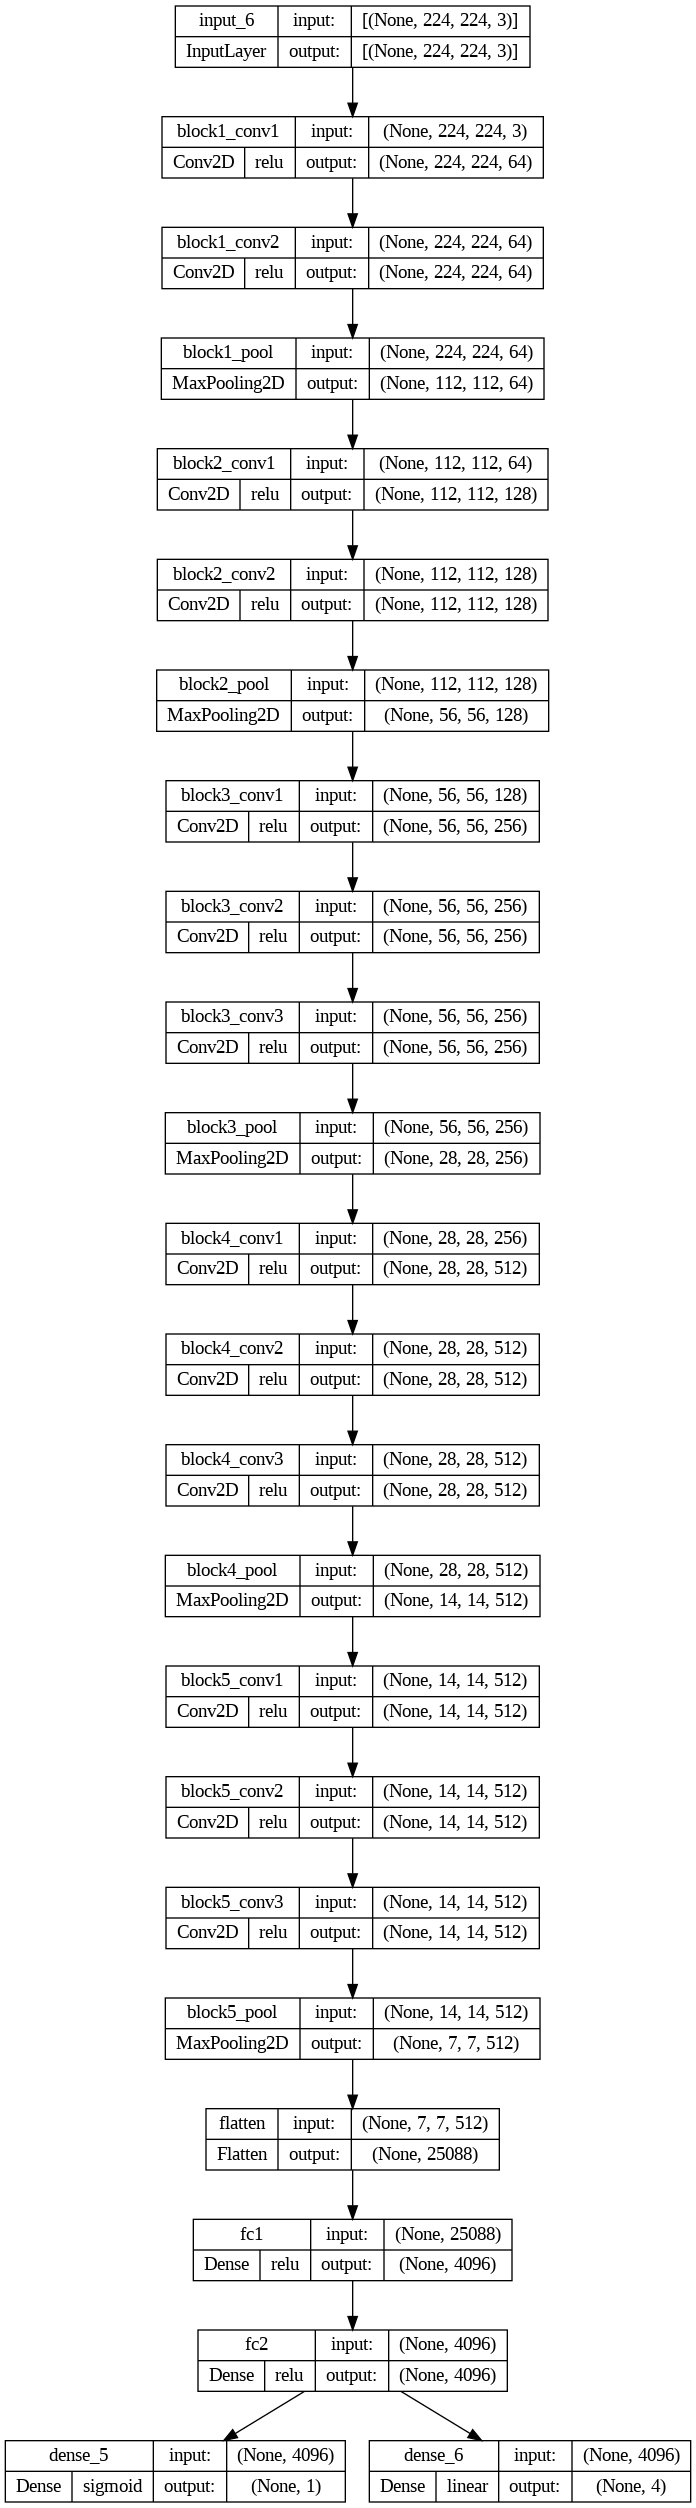

In [ ]:
plot_model(model,show_shapes=True,expand_nested=True,show_layer_activations=True)

In [ ]:
for layer in model.layers[:-6]:
    layer.trainable=False

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_6[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss=['binary_crossentropy','mean_absolute_error'], metrics=['accuracy'],loss_weights=[10., 1.])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau

checkpoint = ModelCheckpoint('SOD.h5',
                            monitor="val_loss",
                            verbose=1,
                            save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=4,
                              min_lr=1e-6,
                              verbose=1)


early_stopping = EarlyStopping(
                              monitor='val_loss',
                              patience=6,
                              restore_best_weights=True,
                              verbose=1)

In [ ]:
history=model.fit(train_gen,
          epochs=30,
          steps_per_epoch=len(train_gen),
          validation_data=val_gen,
          validation_steps=len(val_gen),
          callbacks=[checkpoint,reduce_lr,early_stopping])


Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 62.3616 - classification_loss: 1.6342 - bbox_loss: 43.3341 - classification_accuracy: 0.9039 - bbox_accuracy: 0.6263
Epoch 1: val_loss improved from inf to 24.71037, saving model to SOD.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 59s 1s/step - loss: 62.3616 - classification_loss: 1.6342 - bbox_loss: 43.3341 - classification_accuracy: 0.9039 - bbox_accuracy: 0.6263 - val_loss: 24.7104 - val_classification_loss: 0.1943 - val_bbox_loss: 20.0805 - val_classification_accuracy: 0.9870 - val_bbox_accuracy: 0.6484 - lr: 1.0000e-04
Epoch 2/30
47/47 [==============================] - ETA: 0s - loss: 27.1514 - classification_loss: 0.0835 - bbox_loss: 23.6299 - classification_accuracy: 0.9877 - bbox_accuracy: 0.7713
Epoch 2: val_loss improved from 24.71037 to 21.99501, saving model to SOD.h5
47/47 [==============================] - 60s 1s/step - loss: 27.1514 - classification_loss: 0.0835 - bbox_loss: 23.6299 - classification_accuracy: 0.9877 - bbox_accuracy: 0.7713 - val_loss: 21.9950 - val_classification_loss: 0.1943 - val_bbox_loss: 17.3657 - val_classification_accuracy: 0.9844 - val_bbox_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 3/30
47/47 [==============================] - ETA: 0

In [ ]:
import matplotlib.patches as patches

def plot_single_bounding_box(image, box, label):
    """
    Plot a single bounding box on an image with a label.

    Parameters:
    - image: The input image (numpy array).
    - box: Bounding box in the format [xmin, ymin, xmax, ymax].
    - label: The label for the bounding box.

    Returns:
    - An image with the bounding box and label drawn.
    """
    image_copy = image.copy()  # Create a copy to avoid modifying the original image
    xmin, ymin, xmax, ymax = box

    # Convert bounding box coordinates to integers
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)

    # Draw bounding box
    cv2.rectangle(image_copy, (xmin, ymin), (xmax, ymax), (0, 50, 250), 2)

    # Display label above the bounding box
    cv2.putText(image_copy, label, (xmin, ymin + 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (50, 250, 50), 3)

    return image_copy

In [ ]:
images,[classes,BBox]=next(iter(test_gen))

class_,Bboxs=model.predict(preprocess_input(images.copy()))

2/2 [==============================] - 0s 154ms/step


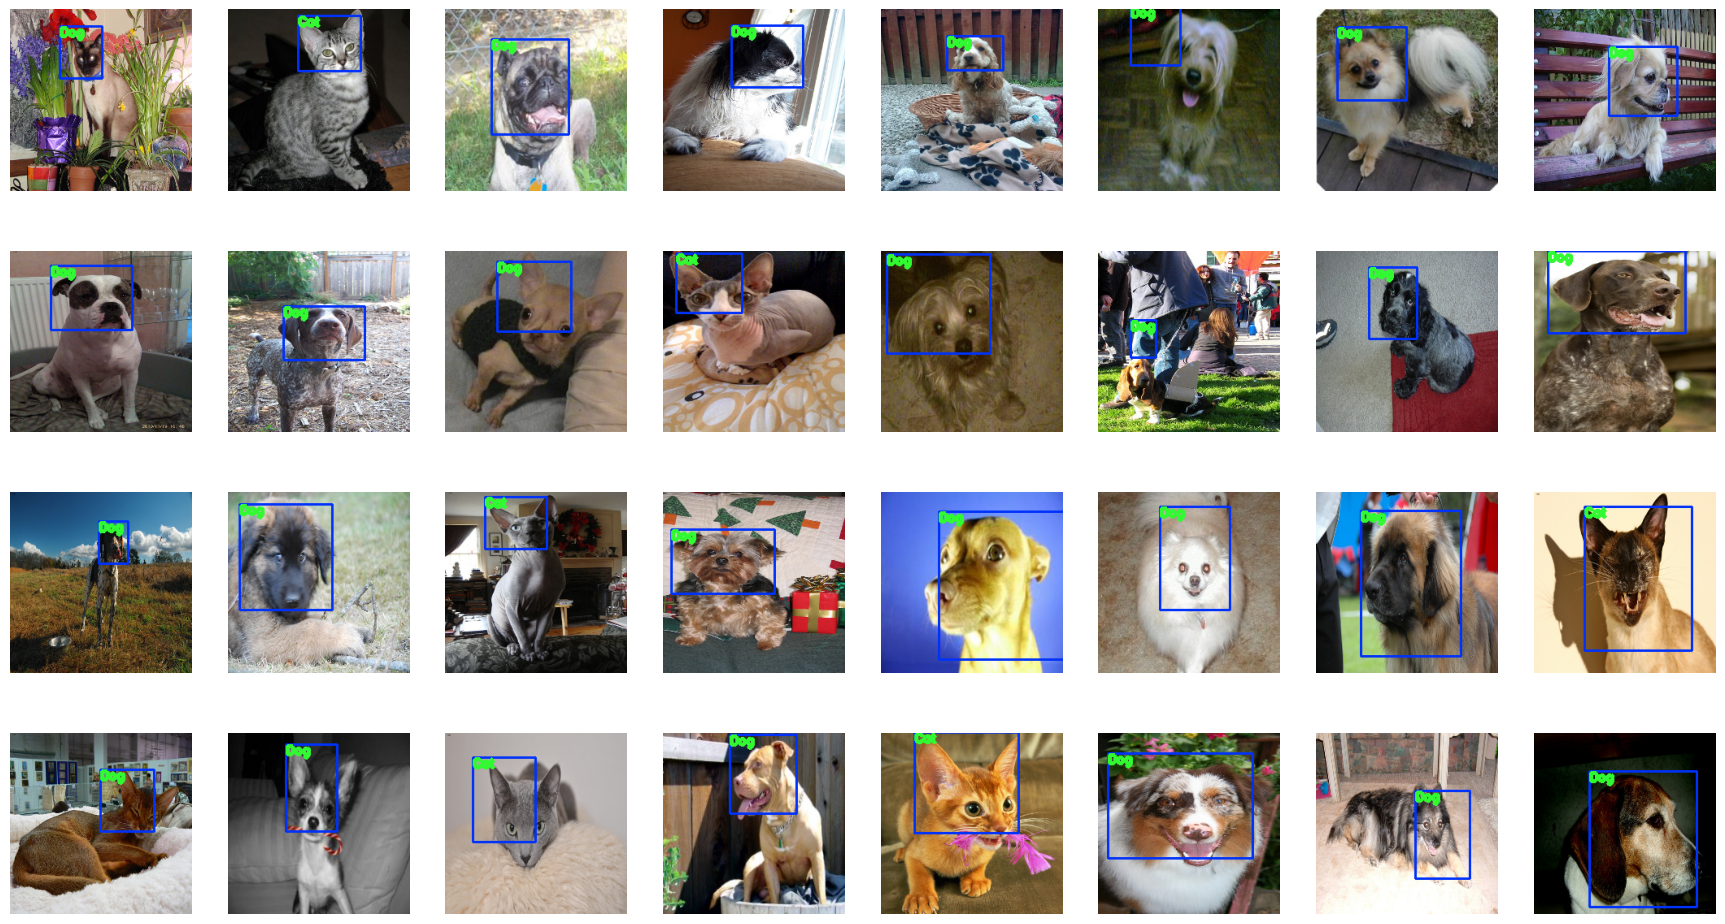

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(22,12), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    bb = Bboxs[i]
    img = images[i]
    class_label = 'Cat' if class_[i][0]==1 else 'Dog'

    # Plot the image with the bounding box and label drawn
    plotted_image = plot_single_bounding_box(img, bb, class_label)
    ax.imshow(plotted_image / 255.)
    ax.axis('off')

plt.show()


In [ ]:
model.save('SOD.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
